# __Machine Learning Coursework 1 - Linear Regression with Stochastic Gradient Descent (SGD)__

#### Step 1 - Exploratory Data Analysis (EDA) 
Purpose: To understand the structure, distribution, and quality of the dataset. This ensures that the data is clean (no missing values) and suitable for modeling without requiring transformations

In [1]:
#importing all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
# Load the dataset
data = r"window_heat.csv"
df = pd.read_csv(data)

In [3]:
# Display the first few rows of the dataframe for an overview
df.head()

,dT[C],Qdot[W]
0,21.178681,11401.184490
1,14.291487,7685.340740
2,4.461636,2008.096958
3,12.111569,5101.150536
4,10.510689,6033.044369


In [4]:
# Provide summary statistics to understand the data distribution
df.describe()

,dT[C],Qdot[W]
count,24.000000,24.000000
mean,12.817510,6398.294138
std,6.413851,3290.322723
min,1.054535,482.653133
25%,8.813390,4336.959436
50%,12.858729,6378.707791
75%,18.042443,9143.042818
max,21.930115,11507.788760


In [5]:
# Check for missing values in the dataset
print(df.isnull().sum())

dT[C]      0
Qdot[W]    0
dtype: int64


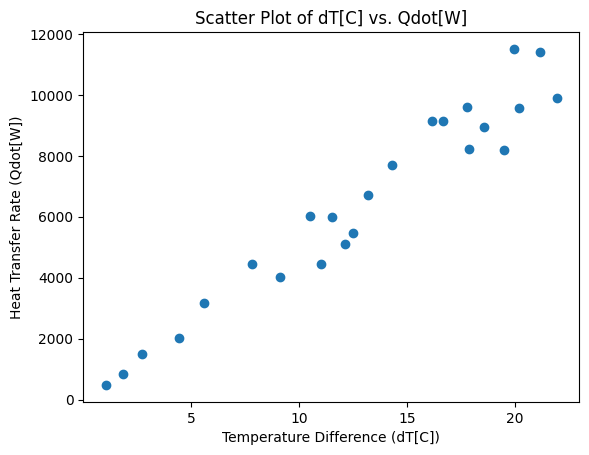

In [6]:
# Scatter plot to visualize the relationship between 'dT[C]' (temperature) and 'Qdot[W]'
plt.scatter(df['dT[C]'], df['Qdot[W]'])
plt.xlabel('Temperature Difference (dT[C])')
plt.ylabel('Heat Transfer Rate (Qdot[W])')
plt.title('Scatter Plot of dT[C] vs. Qdot[W]')
plt.show()

Conclusion: All data is available, no missing values, and the data appears normally distributed.

#### Step 2 - Define the Loss and Model Functions
Purpose: To set up the mathematical foundation for linear regression. This includes defining loss functions (MSE and MAE) to quantify model accuracy and implementing SGD to optimize model parameters (weight and bias).

In [7]:
# Normalizing the feature (x) and target (y) to scale between 0 and 1
x= df["dT[C]"]
y=df["Qdot[W]"]
x = (x - np.min(x)) / (np.max(x) - np.min(x))
y = (y - np.min(y)) / (np.max(y) - np.min(y))
points = len(x)

# Display normalized values (sanity check)
print(x)

0     0.964004
1     0.634088
2     0.163210
3     0.529664
4     0.452977
5     0.037599
6     0.722763
7     0.477402
8     0.502432
9     0.582549
10    0.839764
11    0.805104
12    0.000000
13    0.387519
14    0.548360
15    0.800288
16    0.747985
17    0.905421
18    0.218149
19    0.324130
20    0.883355
21    0.916948
22    1.000000
23    0.079813
Name: dT[C], dtype: float64


In [8]:
# Function to compute the Mean Squared Error (MSE) loss
def lossmse(w, b, x, y, points):
    """
    w: weight
    b: bias
    x: feature
    y: label
    points: length of dataset 
    
    """
    total_loss = 0
    for i in range(points):
        total_loss += (y[i]-w*x[i]+b)**2
    
    total_loss = total_loss / float(points)
        
    return total_loss

In [9]:
# Function to perform linear regression using Stochastic Gradient Descent (SGD) with MSE loss
def sgd_linear_regression(x, y, w, b, alpha, points, epoch):
    """
    x: feature
    y: label
    w: initial / current weight
    b: initial / current bias
    alpha: learning rate
    points: length of dataset 
    epoch: number of training iterations
    """
    
    cost_list = []
    epoch_list = []

    for i in range(epoch):
        # Select a random data point for stochastic gradient descent
        random_index = random.randint(0, points - 1)
        x_i = x[random_index]
        y_i = y[random_index]

        # Predict the output
        y_predicted = w * x_i + b

        # Compute gradients for this data point
        dl_dw = -2.0 * x_i * (y_i - y_predicted)
        dl_db = -2.0 * (y_i - y_predicted)

        # Update weights and bias
        w = w - alpha * dl_dw
        b = b - alpha * dl_db

        # Compute the loss
        loss = lossmse(w, b, x, y, points)
        #loss = (y_i - y_predicted) ** 2

        # Log loss every 10 epochs
        if i % 100 == 0:
            cost_list.append(loss)
            epoch_list.append(i)
            print(f'Epoch:{i}, Loss:{loss}')

    return w, b, loss, cost_list, epoch_list



#### Step 3 - Train the Model and Visualize Results
Purpose: To apply the defined methods, optimize the model parameters using SGD, and evaluate its performance by plotting predictions and observing cost reduction trends for MSE.

In [10]:
# Train the model using MSE loss
w,b,loss,cost_list,epoch_list = sgd_linear_regression(x,y,1,1,0.01,points=points,epoch=10000)

Epoch:0, Loss:0.9161566877361736
Epoch:100, Loss:0.1982761943856816
Epoch:200, Loss:0.1324963688399618
Epoch:300, Loss:0.10451962257819147
Epoch:400, Loss:0.0720393470267095
Epoch:500, Loss:0.06550316096491929
Epoch:600, Loss:0.04573935746364927
Epoch:700, Loss:0.03959963012750516
Epoch:800, Loss:0.03248572619365481
Epoch:900, Loss:0.02428638537450158
Epoch:1000, Loss:0.023002410675657628
Epoch:1100, Loss:0.019644428712331765
Epoch:1200, Loss:0.01623077477015482
Epoch:1300, Loss:0.012682866070870847
Epoch:1400, Loss:0.011106026991831136
Epoch:1500, Loss:0.011089513403549515
Epoch:1600, Loss:0.009769247178380678
Epoch:1700, Loss:0.009585335000458111
Epoch:1800, Loss:0.009068216398767015
Epoch:1900, Loss:0.00810686382063316
Epoch:2000, Loss:0.008192067707265079
Epoch:2100, Loss:0.007047063596240366
Epoch:2200, Loss:0.006241764471264454
Epoch:2300, Loss:0.006611571643972963
Epoch:2400, Loss:0.0063414649830215416
Epoch:2500, Loss:0.005828294031192351
Epoch:2600, Loss:0.005504617277233728
E

In [11]:
# Display final weight and bias
print("MSE Optimization: Weight:", w, "Bias:", b)

MSE Optimization: Weight: 0.9398919913819505 Bias: 0.013657611346403205


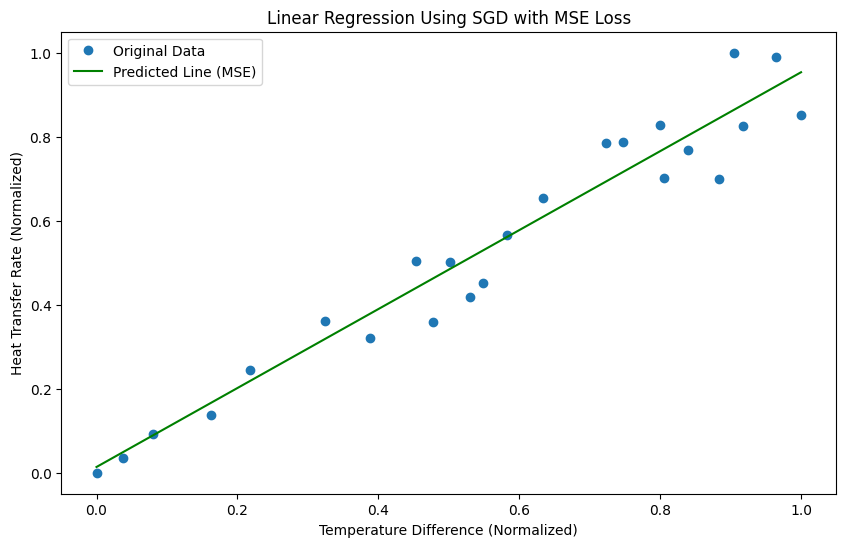

In [12]:
# Plot the original data and the predicted regression line (MSE)
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', ls='', label='Original Data')
plt.plot([0, 1], [b, w*1 + b], label='Predicted Line (MSE)', color='green')
plt.xlabel('Temperature Difference (Normalized)')
plt.ylabel('Heat Transfer Rate (Normalized)')
plt.title('Linear Regression Using SGD with MSE Loss')
plt.legend()
plt.show()


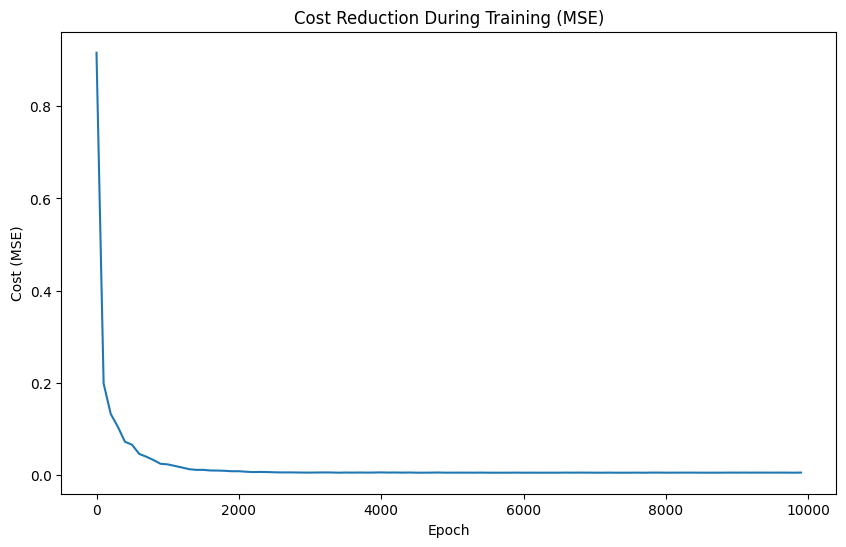

In [13]:
# Plot the cost reduction over epochs
plt.figure(figsize=(10, 6))
plt.plot(epoch_list, cost_list)
plt.xlabel('Epoch')
plt.ylabel('Cost (MSE)')
plt.title('Cost Reduction During Training (MSE)')
plt.show()